In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import random
# from 线段补全 import record_target_counts
dir_place = r'.\datasets'
datasets = pd.read_csv(r'.\datasets\LDS-1518\Data\20343.csv')
datasets.drop(["Cell HMS LINCS ID", "Small Molecule HMS LINCS ID"],axis=1, inplace=True)

x = datasets.drop(["Mean Normalized Growth Rate Inhibition Value", "Increased Fraction Dead"], axis = 1)
y = datasets[["Mean Normalized Growth Rate Inhibition Value", "Increased Fraction Dead"]]

grouped = datasets.groupby(["Cell Name"])
Cell_Name_list = []
for value, group in grouped:
    Cell_Name_list.append(group["Cell Name"].values[0])

grouped2 = datasets.groupby(["Small Molecule Name"])

Drug_Name_list = []
for value, group in grouped2:
#     print(group["Small Molecule Name"].values)
    Drug_Name_list.append(group["Small Molecule Name"].values[0])
#form the datasets class
def plot_pic_GR(Cell_order=0,Drug_order=0,x=x, y=y,Drug_Name_list=Drug_Name_list,Cell_Name_list=Cell_Name_list):
    Drug_Name = Drug_Name_list[Drug_order]
    Cell_Name = Cell_Name_list[Cell_order]
#     print(Drug_Name)
#     the_choice=x[x['Cell Name']==Cell_Name_list[Cell_order]][x['Small Molecule Name']==Drug_Name_list[Drug_order]]
    the_choice = x[x['Cell Name']==Cell_Name_list[Cell_order]]
    the_choice = the_choice[the_choice['Small Molecule Name']==Drug_Name_list[Drug_order]]
    # print(the_choice)
#     print(the_choice)
    index_num = the_choice.index.tolist()
#     values_list_c = x[["Small Mol Concentration (uM)"]]
    concentration = [x[["Small Mol Concentration (uM)"]].values[i][0] for i in index_num]
#     print(concentration)
    GR = [y[["Mean Normalized Growth Rate Inhibition Value"]].values[i][0] for i in index_num]
    # IFD = [y[["Increased Fraction Dead"]].values[i][0] for i in index_num]
    plt.figure()
    plt.plot(np.log10(np.array(concentration)), GR, "red")
    plt.xlabel("Small Mol Concentration (uM)")
    plt.ylabel("Mean Normalized Growth")
    plt.title(f"Drug_concentration--GR\nCell name:{Cell_Name}  Drug name:{Drug_Name}\naxis=({Cell_order}, {Drug_order})")
    plt.ylim((-1.5, 1.5))
    plt.show()
#form the datasets class
the_data_pool = np.ones((len(Cell_Name_list), len(Drug_Name_list), 10), dtype=np.int)

#form the datasets class
def get_ininital_datas(Drug_Name_list = Drug_Name_list, Cell_Name_list = Cell_Name_list, range_of_Concentration=9):
    initial_choice = []
    initial_list = [x for x in range(len(Drug_Name_list))]
    for i in range(len(Cell_Name_list) - len(Drug_Name_list)):
        initial_list += [random.randint(0, len(Drug_Name_list) - 1)]
    random.shuffle(initial_list)
    for i in range(len(initial_list)):
        initial_choice.append((i, initial_list[i], range_of_Concentration - 1))
    return initial_choice
#form the datasets class
def get_ininital_datas_two_points(Drug_Name_list = Drug_Name_list, Cell_Name_list = Cell_Name_list, range_of_Concentration=9):
    the_observer_D = [i for i in range(len(Drug_Name_list))]
    the_observer_C = [i for i in range(len(Cell_Name_list))]
    random.shuffle(the_observer_C)
    random.shuffle(the_observer_D)
    # the_observer_C.pop()
    the_choice = list(zip(the_observer_C, the_observer_D))
    start_list = [0 for i in range(len(the_choice))]
    end_list = [range_of_Concentration for i in range(len(the_choice))]
    the_choice = list(zip(the_observer_C, the_observer_D, start_list)) + list(zip(the_observer_C, the_observer_D, end_list))
    return the_choice
#form the datasets class
def generate_test_matrix(Drug_Name_list = Drug_Name_list, Cell_Name_list = Cell_Name_list, range_of_Concentration=9):
    test_matrix = [[[True, [True for i in range(range_of_Concentration)]] for ii in range(len(Drug_Name_list))] for iii in range(len(Cell_Name_list))]
    print(np.array(test_matrix).shape)
#data sets class, critical!!!!!!!
class dataset_space_matrix():
    #构造函数
    def __init__(self, Drug_Name_list = Drug_Name_list, Cell_Name_list = Cell_Name_list, range_of_Concentration=9, x=x, y=y):
        self.datapool = np.array([[[True, [True for i in range(range_of_Concentration)],
                                    [0.0 for x in range(range_of_Concentration)], [0.0 for x in range(range_of_Concentration)]]
                                   for ii in range(len(Drug_Name_list))] for
                       iii in range(len(Cell_Name_list))])
        self.reference = datasets
        self.Drug_Name_list = Drug_Name_list
        self.Cell_Name_list = Cell_Name_list
        self.range_of_Concentration = range_of_Concentration

    def delete_point_test_matrix(self, address):
        x = address[0]
        y = address[1]
        z = address[2]
        # print(self.datapool[x, y, 1], x, y, z)
        self.datapool[x, y, 1][address[2] - 1] = False
        if not(any(self.datapool[x, y, 1])):
            self.datapool[x, y, 0] = False

    def delete_point_test_matrix_group(self, addresses):
        print("删除，似乎和updata重复但实际上不太一样")
        for address in addresses:
            self.delete_point_test_matrix(address)

    def show_curve_test_matrix(self, address):
        x = address[0]
        y = address[1]
        print(self.datapool[x, y, :])
    # #返回一个优先值数据矩阵
    # def return_priority_of_datapools(self, target_vector):
    #     dirs = record_target_counts(target_vector)
    #     target_matrix = np.array(target_vector).reshape([len(self.Cell_Name_list), len(self.Drug_Name_list)])
    #     the_scores_for_combintaions = np.zeros((self.datapool.shape[0], self.datapool.shape[1]))
    #     for x in range(self.datapool.shape[0]):
    #         for y in range(self.datapool.shape[1]):
    #             #the_first_standard
    #             the_finished_count = np.sum(np.array([1 if x else 0 for x in self.datapool[x, y, 1]]))
    #             the_finished_score = the_finished_count/self.range_of_Concentration
    #             #the_second_standard########################
    #             # ##########################################
    #             # ############感觉还是需要考虑一下这个
    #             the_certainty_score = np.random.randint(0, 1)
    #             ####还有一个别的函数的关联性没有考虑####
    #             the_relationship_score = dirs[target_matrix[x, y]]
    #             the_score_this_point = the_finished_score + the_certainty_score + the_relationship_score
    #             the_scores_for_combintaions[x, y] = the_score_this_point
    #             ####
    #     return the_scores_for_combintaions
    #选择这一轮选出的点
    def choose_the_data_for_this_round(self, target_vector, threshold=35):
        priority_matrix = self.return_priority_of_datapools(target_vector)
        print("选点", priority_matrix.shape)
        NEWS = priority_matrix.flatten()
        numbers = NEWS.argsort()[::-1]
        result = numbers[:threshold]
        result2 = []
        for i in result:
            result2.append((i // priority_matrix.shape[1], i % priority_matrix.shape[1]))
        # print(numbers[:threshold])
        ###这里应该还是能优化的
        return result2
        ###

    def update_datapool(self, order_list):
        print("正在更新")
        for index in order_list:
            Cell_Name = self.Cell_Name_list[index[2]]
            Drug_Name = self.Drug_Name_list[index[1]]
            tmp = datasets[(datasets["Small Molecule Name"]==Drug_Name)]
            tmp = tmp[(tmp["Cell Name"] == Cell_Name)]
            self.datapool[index[0], index[1], 1][index[2]] = False
            # self.datapool[index[0], index[1], 2][index[2]] = 1
            # self.datapool[index[0], index[1], 3][index[2]] = 1
            # print(tmp)
            # print(tmp["Mean Normalized Growth Rate Inhibition Value"].iloc[index[2]])
            # print(tmp["Increased Fraction Dead"].iloc[index[2]])
            self.datapool[index[0], index[1], 2][index[2]] = tmp["Mean Normalized Growth Rate Inhibition Value"].iloc[index[2]]
            self.datapool[index[0], index[1], 3][index[2]] = tmp["Increased Fraction Dead"].iloc[index[2]]
            print(self.datapool[index[0], index[1], :])
            #检查是否已经填满了
            if all(self.datapool[index[0], index[1], 1]) == False:
                self.datapool[index[0], index[1], 0] = False
            #我已经填入了

    def return_curve_of_position(self, coordinate):
        GR = self.datapool[coordinate[0], coordinate[1], 2]
        IFD = self.datapool[coordinate[0], coordinate[1], 3]
        Cell_Name = self.Cell_Name_list[coordinate[0]]
        Drug_Name = self.Drug_Name_list[coordinate[1]]
        tmp = datasets[(datasets["Small Molecule Name"] == Drug_Name)]
        tmp = tmp[(tmp["Cell Name"] == Cell_Name)]
        Concentration = [tmp["Small Mol Concentration (uM)"].iloc[i] for i in range(self.range_of_Concentration)]
        return GR, IFD, Concentration

    def show_curve_of_position(self, index):
        GR, IFD = self.return_curve_of_position(index)
        plt.figure(0)
        plt.plot([x for x in range(len(GR))], GR, "red")
        plt.figure(1)
        plt.plot([x for x in range(len(GR))], IFD, "blue")
        plt.show()

    def fulfill_curve_of_position(self, coordinate):
        for index in coordinate:
            print(index[0], index[1])
            Cell_Name = self.Cell_Name_list[index[0]]
            Drug_Name = self.Drug_Name_list[index[1]]
            tmp = datasets[(datasets["Small Molecule Name"] == Drug_Name)]
            tmp = tmp[(tmp["Cell Name"] == Cell_Name)]
            for i in range(self.range_of_Concentration):
                self.datapool[index[0], index[1], 2][i] = \
                tmp["Mean Normalized Growth Rate Inhibition Value"].iloc[i]
                self.datapool[index[0], index[1], 3][i] = tmp["Increased Fraction Dead"].iloc[i]
            self.datapool[index[0], index[1], 0] = False

    def initialize(self):
        for i in range(self.datapool.shape[0]):
            for j in range(self.datapool.shape[1]):
                self.update_datapool([[i, j, 0], [i, j, -1]])
    #这段代码补全的是线段，目前可以根据和别的同种类型的
    def make_up_curves(self, Target_Matrix=None):
        #the_first_round
        if Target_Matrix == None:
            for i in range(self.datapool.shape[0]):
                for j in range(self.datapool.shape[1]):
                    GR = self.datapool[i, j, 2].copy()
                    length = (GR[-1] - GR[0]) / (len(GR) - 1)
                    for t in range(1, len(GR) - 1, 1):
                        self.datapool[i, j, 2][t] = GR[0] + length * t
        #the_after_round
        else:
            for i in range(self.datapool.shape[0]):
                for j in range(self.datapool.shape[1]):
                    pass
                    # self.update_datapool([[i, j, 0], [i, j, -1]])

    def f(self, x, y, layers):
        print(x, y)
        Cell_Name = self.Cell_Name_list[x]
        Drug_Name = self.Drug_Name_list[y]
        tmp = datasets[(datasets["Small Molecule Name"] == Drug_Name)]
        tmp = tmp[(tmp["Cell Name"] == Cell_Name)]
        GR = tmp["Mean Normalized Growth Rate Inhibition Value"].iloc[
            layers]
        IFD = tmp["Increased Fraction Dead"].iloc[layers]
        return GR, IFD

    def show_one_layer(self, layers):
        x = np.linspace(1, len(self.Cell_Name_list), len(self.Cell_Name_list))
        y = np.linspace(1, len(self.Drug_Name_list), len(self.Drug_Name_list))
        X, Y = np.meshgrid(x, y)
        # print("X", X.shape)
        # print(X)
        # print("?????????????????", X.shape, Y.shape)
        Z = np.zeros((len(x), len(y)))
        # print("Z", Z.shape)
        for ix in range(len(x)):
            for iy in range(len(y)):
                Cell_Name = self.Cell_Name_list[ix]
                Drug_Name = self.Drug_Name_list[iy]
                tmp = datasets[(datasets["Small Molecule Name"] == Drug_Name)]
                tmp = tmp[(tmp["Cell Name"] == Cell_Name)]
                GR = tmp["Mean Normalized Growth Rate Inhibition Value"].iloc[
                    layers]
                # IFD = tmp["Increased Fraction Dead"].iloc[layers]
                Z[ix, iy] = GR

        # fig = plt.figure(figsize=(10.5, 5))
        # ax1 = fig.add_subplot(121, projection='3d')  # 画上一个1*2的图形，在第一个位置，这就是121的含义
        # surf = ax1.plot_wireframe(X, Y, np.transpose(Z), rstride=10, cstride=1, antialiased=True)
        # # ax1.scatter([[13]], [[28]], [[Z[13, 28]]] , c='red')
        # plt.show()
        return X, Y, np.transpose(Z), x, y

    def show_one_layers(self, start=0, end=9):
        final_Z = []
        for i in range(start, end, 1):
            X, Y, Z_tmp, x, y = self.show_one_layer(i)
            final_Z.append(np.transpose(Z_tmp))

        return X, Y, np.array(final_Z), x, y

In [2]:
#no use
def classify_curves():
    print("分类曲线")
    pass
#no use
def make_up_curves():
    print("曲线优化补全")
    pass
#activate the class of datasets
def get_ininital_datas_curve_lines(Drug_Name_list = Drug_Name_list, Cell_Name_list = Cell_Name_list, range_of_Concentration=10):
    the_observer_D = [i for i in range(len(Drug_Name_list))]
    the_observer_C = [i for i in range(len(Cell_Name_list))]
    random.shuffle(the_observer_C)
    random.shuffle(the_observer_D)
    # the_observer_C.pop()
    the_choice = list(zip(the_observer_C, the_observer_D))
    return the_choice
#not used in this case
def get_observation_data(Drug_Name_list = Drug_Name_list, Cell_Name_list = Cell_Name_list, range_of_Concentration=10):
    the_observer_D = [i for i in range(len(Drug_Name_list))]
    the_observer_C = [i for i in range(len(Cell_Name_list))]
    random.shuffle(the_observer_C)
    random.shuffle(the_observer_D)
    # the_observer_C.pop()
    the_choice = list(zip(the_observer_C, the_observer_D))
    result = []
    for i in range(len(the_choice)):
        result.append([the_choice[i]] + [x] for x in range(10))
    return result
#search values in the true data pool
def data_extract(reg_space, current_Z):
    reg_space_result = []
    reg_space_input = []
    reg_space_index = []
    for index in range(len(reg_space)):
        reg_space_input.append(reg_space[index][0])
        reg_space_result.append(current_Z[reg_space[index][1][0], reg_space[index][1][1], reg_space[index][1][2]])
        reg_space_index.append(reg_space[index][1])
    reg_space_input = np.array(reg_space_input)
    reg_space_result = np.array(reg_space_result)
    reg_space_index = np.array(reg_space_index)
    return reg_space_input, reg_space_result, reg_space_index
#not be used in this case
def transmit_final(output, valid_list, X):
    out_final = np.zeros(X.shape)
    for index in range(len(valid_list)):
        out_final[valid_list[index][1][0], valid_list[index][1][1]] = output[index]
    return out_final
#adjust matrix with given shoot1, shoot2(the arrangement of moving matrix)
def move_matrix(current_Z, shoot1, shoot2):
    # print("进来", current_Z.shape)
    order_count = []
    tmp = []
    for i in range(current_Z.shape[0]):
        order_count.append([i, current_Z[i, :]])
    for i in range(len(shoot1)):
        tmp.append(order_count[shoot1[i]][1])

    order_count = []
    current_Z = np.array(tmp)
    tmp = []
    for i in range(current_Z.shape[1]):
        order_count.append([i, current_Z[:, i]])
    for i in range(len(shoot2)):
        tmp.append(order_count[shoot2[i]][1])
    result = np.array(tmp)
    return np.transpose(result)
#turn the final output vector into the shape of target matrix/cubes
def transmit_final3d(output, valid_list, current_Z):
    out_final = np.zeros(current_Z.shape)
    for index in range(len(valid_list)):
        out_final[valid_list[index][1][0], valid_list[index][1][1], valid_list[index][1][2]] = output[index]
    return out_final
#AM method on matrix/cubes
def change_cubes(current_Z):
    top_Z = current_Z[-1, :, :]
    top_Z, shoot1 = change1(top_Z)
    _, shoot2 = change2(top_Z)
    new_current_Z = [move_matrix(current_Z[index, :, :], shoot1, shoot2) for index in range(current_Z.shape[0])]
    return np.array(new_current_Z), shoot1, shoot2
# def change_cubes_visit(current_Z, shoot1, shoot2):
#     # top_Z = current_Z[-1, :, :]
#     # top_Z, shoot1 = change1(top_Z)
#     # _, shoot2 = change2(top_Z)
#     new_current_Z = [move_matrix(current_Z[index, :, :], shoot1, shoot2) for index in range(current_Z.shape[0])]
#     return np.array(new_current_Z), shoot1, shoot2
#not be used in the case
def change_cubes_with_visit(current_Z, out_final):
    scores = [np.sum(out_final[index, :, :]) for index in range(out_final.shape[0])]
    print(scores)
    reference1 = out_final[-1, :, :].copy()
    reference1, shoot1 = change1(reference1)
    _, shoot2 = change2(reference1)

    # top_Z = current_Z[-1, :, :]
    # top_Z, shoot1 = change1(top_Z)
    # _, shoot2 = change2(top_Z)
    new_current_Z = [move_matrix(current_Z[index, :, :], shoot1, shoot2) for index in range(current_Z.shape[0])]
    return np.array(new_current_Z)
# def shoot_change_input(inputs, shoot1, shoot2):
#     shoot1s = [(i, shoot1[i]) for i in range(len(shoot1))]
#     shoot1s.sort(key=lambda k:k[1])
#     shoot1 = [item[0] for item in shoot1s]
#     shoot2s = [(i, shoot2[i]) for i in range(len(shoot2))]
#     shoot2s.sort(key=lambda k: k[1])
#     shoot2 = [item[0] for item in shoot2s]
#
#
#     result = []
#     for item in inputs:
#         result.append([item[0], shoot1[int(item[1]) - 1], shoot2[int(item[2]) - 1]])
#     return np.array(result)


#adjust the input sampling point position with sampling points
def shoot_change_input(inputs, shoot1, shoot2):
    shoot1s = [(i, shoot1[i]) for i in range(len(shoot1))]
    shoot1s.sort(key=lambda k:k[1])
    shoot1 = [item[0] for item in shoot1s]
    shoot2s = [(i, shoot2[i]) for i in range(len(shoot2))]
    shoot2s.sort(key=lambda k: k[1])
    shoot2 = [item[0] for item in shoot2s]


    result = []
    for item in inputs:
        result.append([item[0], shoot1[int(item[1]) - 1] + 1, shoot2[int(item[2]) - 1] + 1])
    return np.array(result)
#update arrangement with new shoot
def arrange_shoot(shoot1, shoot1_):
    result = []
    for i in range(len(shoot1_)):
        result.append(shoot1[shoot1_[i]])
    return result
#adjust cubes with given shoot1, shoot2(the arrangement of moving matrix)
def change_cubes_visit(current_Z, shoot1, shoot2):
    new_current_Z = [move_matrix(current_Z[index, :, :], shoot1, shoot2) for index in range(current_Z.shape[0])]
    return np.array(new_current_Z)
#select sampling points with the highest std
def accusition_sample(model, remaining_point_sets, threshold=50, shape=(34, 35)):
    _, stds = model.predict(remaining_point_sets, return_std=True)
    # stds_final = np.zeros(shape)
    # for index in range(len(stds)):
    #     stds_final[int(remaining_point_sets[index][0]), int(remaining_point_sets[index][1])] = stds[index]
        # expectations_final[int(remaining_point_sets[index][1]) - 1, int(remaining_point_sets[index][0]) - 1] = expectations[index]

    stds_judge = np.c_[stds, [x for x in range(len(remaining_point_sets))], [x for x in remaining_point_sets]].tolist()
    stds_judge = sorted(stds_judge, key=lambda x: x[0])
    stds_judge = stds_judge[-threshold:]
    # print(stds_judge)
    # the_choosen_ones = [[int(stds_judge[x][1]), int(stds_judge[x][2])] for x in range(len(stds_judge))]
    the_choosen_orders = [int(stds_judge[x][1]) for x in range(len(stds_judge))]
    # print(the_choosen_orders)
    # print(remaining_point_sets[the_choosen_orders[0]])
    # plt.figure()
    # plt.contourf(X, Y, stds_final)
    # plt.title("see this")
    # plt.figure()
    # plt.contourf(X, Y, expectations_final)
    # plt.title("see this expectataions")
    # plt.show()
    return stds, the_choosen_orders
# AM method, used to sort rows of the matrix
def change1(out_final):
    order_count = []
    for i in range(out_final.shape[0]):
        order_count.append([i, np.sum(out_final[i, :])])

    order_count = sorted(order_count, key=lambda x: x[1])
    letscheck = []
    shoot = []
    for i in range(len(order_count)):
        letscheck.append(out_final[order_count[i][0], :])
        shoot.append(order_count[i][0])
    letscheck = np.array(letscheck)
    return letscheck, shoot #返回映射
# AM method, used to sort columns of the matrix
def change2(out_final):
    order_count = []
    for i in range(out_final.shape[1]):
        order_count.append([i, np.sum(out_final[:, i])])

    order_count = sorted(order_count, key=lambda x: x[1])
    letscheck = []
    shoot = []
    for i in range(len(order_count)):
        letscheck.append(out_final[:, order_count[i][0]])
        shoot.append(order_count[i][0])
    letscheck = np.array(letscheck)
    return np.transpose(letscheck), shoot  #返回映射
#SC on GP model
def train_raw(Z, ini_COL = 2, ini_ROW = 2, INTER_TIMES = 100, SIFT_NUMBER = 1):
    current_Z = Z.copy()
    datas1 = []
    valid_list = []
    input_space = []
    COL, ROW = ini_COL, ini_ROW
    for i in range(len(x)):
        for j in range(len(y)):
            for ij in range(len(h)):
                valid_list.append(([h[ij], x[i], y[j]], [ij, i, j]))
                if i == COL or j == i:
                    datas1.append(([h[ij], x[i], y[j]], [ij, i, j]))
                else:
                    input_space.append(([h[ij], x[i], y[j]], [ij, i, j]))
    initial_list = valid_list.copy()
    valid_list_model, _, _ = data_extract(valid_list, current_Z)  # 直接扔进model里面
    reg_space = datas1.copy()  # 扔进去训练的数据
    # input_spacec = input_space.copy()
    # reg_spacec = reg_space.copy()
    # input_space = input_spacec.copy()  # 剩余的数据库
    # reg_space = reg_spacec.copy()  # 扔进去训练的数据
    inputs, result, reg_space_index = data_extract(reg_space, current_Z)
    recordsss = []
    shoot1 = [i for i in range(len(x))]
    shoot2 = [i for i in range(len(y))]
    model = GaussianProcessRegressor(kernel=rbf)
    # model = RandomForestRegressor(n_estimators=40)
    model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    output = model.predict(valid_list_model)
    out_final = transmit_final3d(output, valid_list, current_Z)
    out_record = out_final.copy()
    recordsss.append(mean_squared_error(out_final.flatten(), current_Z.flatten()))
    # shoot1_, shoot2_ = change_matrix(out_final2)
    # _, shoot1_, shoot2_ = change_cubes(current_Z)
    # shoot1 = arrange_shoot(shoot1, shoot1_)
    # shoot2 = arrange_shoot(shoot2, shoot2_)
    for times in range(INTER_TIMES):
        if times != 0:
            random.shuffle(input_space)
            for i in range(SIFT_NUMBER):
                reg_space.append(input_space.pop(i))
            # print(times, len(reg_space), len(input_space))

        inputs, result, _ = data_extract(reg_space, current_Z)
        # model = GaussianProcessRegressor()
        model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        # 检查模型的效果#
        output = model.predict(valid_list_model)
        out_final = transmit_final3d(output, valid_list, current_Z)
        recordsss.append(
            mean_squared_error(out_final.flatten(), change_cubes_visit(current_Z, shoot1, shoot2).flatten()))

    return recordsss
#AM_on true data pool on GP model
def train_AM(Z, ini_COL = 2, ini_ROW = 2, INTER_TIMES = 100, SIFT_NUMBER = 1):
    current_Z = Z.copy()
    datas1 = []
    valid_list = []
    input_space = []
    COL, ROW = ini_COL, ini_ROW
    for i in range(len(x)):
        for j in range(len(y)):
            for ij in range(len(h)):
                valid_list.append(([h[ij], x[i], y[j]], [ij, i, j]))
                if i == COL or j == i:
                    datas1.append(([h[ij], x[i], y[j]], [ij, i, j]))
                else:
                    input_space.append(([h[ij], x[i], y[j]], [ij, i, j]))
    initial_list = valid_list.copy()
    valid_list_model, _, _ = data_extract(valid_list, current_Z)  # 直接扔进model里面
    reg_space = datas1.copy()  # 扔进去训练的数据
    # input_spacec = input_space.copy()
    # reg_spacec = reg_space.copy()
    # input_space = input_spacec.copy()  # 剩余的数据库
    # reg_space = reg_spacec.copy()  # 扔进去训练的数据
    inputs, result, reg_space_index = data_extract(reg_space, current_Z)
    recordsss = []
    shoot1 = [i for i in range(len(x))]
    shoot2 = [i for i in range(len(y))]
    model = GaussianProcessRegressor(kernel=rbf)
    # model = RandomForestRegressor(n_estimators=40)
    model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    output = model.predict(valid_list_model)
    out_final = transmit_final3d(output, valid_list, current_Z)
    out_record = out_final.copy()
    recordsss.append(mean_squared_error(out_final.flatten(), current_Z.flatten()))
    # shoot1_, shoot2_ = change_matrix(out_final2)
    _, shoot1_, shoot2_ = change_cubes(current_Z)
    shoot1 = arrange_shoot(shoot1, shoot1_)
    shoot2 = arrange_shoot(shoot2, shoot2_)
    for times in range(INTER_TIMES):
        if times != 0:
            random.shuffle(input_space)
            for i in range(SIFT_NUMBER):
                reg_space.append(input_space.pop(i))
            # print(times, len(reg_space), len(input_space))

        inputs, result, _ = data_extract(reg_space, current_Z)
        # model = GaussianProcessRegressor()
        model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        # 检查模型的效果#
        output = model.predict(valid_list_model)
        out_final = transmit_final3d(output, valid_list, current_Z)
        recordsss.append(
            mean_squared_error(out_final.flatten(), change_cubes_visit(current_Z, shoot1, shoot2).flatten()))

    return recordsss
#Clustering on GP model
def train_MOVE_C(Z, ini_COL = 2, ini_ROW = 2, INTER_TIMES = 100, SIFT_NUMBER = 1):
    current_Z = Z.copy()
    datas1 = []
    valid_list = []
    input_space = []
    COL, ROW = ini_COL, ini_ROW
    for i in range(len(x)):
        for j in range(len(y)):
            for ij in range(len(h)):
                valid_list.append(([h[ij], x[i], y[j]], [ij, i, j]))
                if i == COL or j == i:
                    datas1.append(([h[ij], x[i], y[j]], [ij, i, j]))
                else:
                    input_space.append(([h[ij], x[i], y[j]], [ij, i, j]))
    initial_list = valid_list.copy()
    valid_list_model, _, _ = data_extract(valid_list, current_Z)  # 直接扔进model里面
    reg_space = datas1.copy()  # 扔进去训练的数据
    # input_spacec = input_space.copy()
    # reg_spacec = reg_space.copy()
    # input_space = input_spacec.copy()  # 剩余的数据库
    # reg_space = reg_spacec.copy()  # 扔进去训练的数据
    inputs, result, reg_space_index = data_extract(reg_space, current_Z)
    recordsss = []
    shoot1 = [i for i in range(len(x))]
    shoot2 = [i for i in range(len(y))]
    model = GaussianProcessRegressor(kernel=rbf)
    model2 = RandomForestRegressor(n_estimators=40)
    model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    model2.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    output = model.predict(valid_list_model)
    output2 = model2.predict(valid_list_model)
    out_final = transmit_final3d(output, valid_list, current_Z)
    out_final2 = transmit_final3d(output2, valid_list, current_Z)
    recordsss.append(mean_squared_error(out_final.flatten(), current_Z.flatten()))
    for times in range(INTER_TIMES):
        ######
        # out_final, shoot1 = change1(out_final)
        # out_final, shoot2 = change2(out_final)
        # current_Z = move_matrix(current_Z, shoot1, shoot2)
        ######
        # _, the_choosen_orders = accusition(model, data_extract(input_space, current_Z)[2], shape=X.shape)
        # the_choosen_orders.sort(reverse=True)
        # # print(len(input_space))
        # # for index in range(len(the_choosen_orders)):
        # #     reg_space.append(input_space.pop(index))
        # add_this_time = []
        # for index in range(len(the_choosen_orders)):
        #     add_this_time.append(input_space.pop(index))
        # reg_space = reg_space + add_this_time
        # print(times, len(reg_space), len(input_space))
        if times % 5 == 0:
            # _, shoot1_, shoot2_ = change_cubes(out_final2)
            shoot1_, shoot2_ = change_matrix(out_final2)
            shoot1 = arrange_shoot(shoot1, shoot1_)
            shoot2 = arrange_shoot(shoot2, shoot2_)

        if times != 0:
            acq_inputs, _, _ = data_extract(input_space, current_Z)
            stds, the_choosen_orders = accusition_sample(model, shoot_change_input(acq_inputs, shoot1, shoot2),
                                                         shape=X.shape,
                                                         threshold=SIFT_NUMBER)

            the_choosen_orders.sort(reverse=True)
            add_this_time = []
            for index in the_choosen_orders:
                add_this_time.append(input_space.pop(index))
            reg_space = reg_space + add_this_time

        inputs, result, _ = data_extract(reg_space, current_Z)
        # model = GaussianProcessRegressor()
        model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        model2.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        # 检查模型的效果#
        output = model.predict(valid_list_model)
        output2 = model2.predict(valid_list_model)
        out_final = transmit_final3d(output, valid_list, current_Z)
        out_final2 = transmit_final3d(output, valid_list, current_Z)

        recordsss.append(
            mean_squared_error(out_final.flatten(), change_cubes_visit(current_Z, shoot1, shoot2).flatten()))

    return recordsss
#AM & std on GP model
def train_MOVE_AM_STD(Z, ini_COL = 2, ini_ROW = 2, INTER_TIMES = 100, SIFT_NUMBER = 1):
    current_Z = Z.copy()
    datas1 = []
    valid_list = []
    input_space = []
    COL, ROW = ini_COL, ini_ROW
    for i in range(len(x)):
        for j in range(len(y)):
            for ij in range(len(h)):
                valid_list.append(([h[ij], x[i], y[j]], [ij, i, j]))
                if i == COL or j == i:
                    datas1.append(([h[ij], x[i], y[j]], [ij, i, j]))
                else:
                    input_space.append(([h[ij], x[i], y[j]], [ij, i, j]))
    initial_list = valid_list.copy()
    valid_list_model, _, _ = data_extract(valid_list, current_Z)  # 直接扔进model里面
    reg_space = datas1.copy()  # 扔进去训练的数据
    # input_spacec = input_space.copy()
    # reg_spacec = reg_space.copy()
    # input_space = input_spacec.copy()  # 剩余的数据库
    # reg_space = reg_spacec.copy()  # 扔进去训练的数据
    inputs, result, reg_space_index = data_extract(reg_space, current_Z)
    recordsss = []
    shoot1 = [i for i in range(len(x))]
    shoot2 = [i for i in range(len(y))]
    model = GaussianProcessRegressor(kernel=rbf)
    model2 = RandomForestRegressor(n_estimators=40)
    model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    model2.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    output = model.predict(valid_list_model)
    output2 = model2.predict(valid_list_model)
    out_final = transmit_final3d(output, valid_list, current_Z)
    out_final2 = transmit_final3d(output2, valid_list, current_Z)
    recordsss.append(mean_squared_error(out_final.flatten(), current_Z.flatten()))
    for times in range(INTER_TIMES):
        ######
        # out_final, shoot1 = change1(out_final)
        # out_final, shoot2 = change2(out_final)
        # current_Z = move_matrix(current_Z, shoot1, shoot2)
        ######
        # _, the_choosen_orders = accusition(model, data_extract(input_space, current_Z)[2], shape=X.shape)
        # the_choosen_orders.sort(reverse=True)
        # # print(len(input_space))
        # # for index in range(len(the_choosen_orders)):
        # #     reg_space.append(input_space.pop(index))
        # add_this_time = []
        # for index in range(len(the_choosen_orders)):
        #     add_this_time.append(input_space.pop(index))
        # reg_space = reg_space + add_this_time
        # print(times, len(reg_space), len(input_space))
        if times % 5 == 0:
            _, shoot1_, shoot2_ = change_cubes(out_final2)
            # shoot1_, shoot2_ = change_matrix(out_final2)
            shoot1 = arrange_shoot(shoot1, shoot1_)
            shoot2 = arrange_shoot(shoot2, shoot2_)

        if times != 0:
            acq_inputs, _, _ = data_extract(input_space, current_Z)
            stds, the_choosen_orders = accusition_sample(model, shoot_change_input(acq_inputs, shoot1, shoot2),
                                                         shape=X.shape,
                                                         threshold=SIFT_NUMBER)

            the_choosen_orders.sort(reverse=True)
            add_this_time = []
            for index in the_choosen_orders:
                add_this_time.append(input_space.pop(index))
            reg_space = reg_space + add_this_time

        inputs, result, _ = data_extract(reg_space, current_Z)
        # model = GaussianProcessRegressor()
        model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        model2.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        # 检查模型的效果#
        output = model.predict(valid_list_model)
        output2 = model2.predict(valid_list_model)
        out_final = transmit_final3d(output, valid_list, current_Z)
        out_final2 = transmit_final3d(output, valid_list, current_Z)

        recordsss.append(
            mean_squared_error(out_final.flatten(), change_cubes_visit(current_Z, shoot1, shoot2).flatten()))

    return recordsss
#AM on GP model
def train_MOVE_AM(Z, ini_COL = 2, ini_ROW = 2, INTER_TIMES = 100, SIFT_NUMBER = 1):
    current_Z = Z.copy()
    datas1 = []
    valid_list = []
    input_space = []
    COL, ROW = ini_COL, ini_ROW
    for i in range(len(x)):
        for j in range(len(y)):
            for ij in range(len(h)):
                valid_list.append(([h[ij], x[i], y[j]], [ij, i, j]))
                if i == COL or j == i:
                    datas1.append(([h[ij], x[i], y[j]], [ij, i, j]))
                else:
                    input_space.append(([h[ij], x[i], y[j]], [ij, i, j]))
    initial_list = valid_list.copy()
    valid_list_model, _, _ = data_extract(valid_list, current_Z)  # 直接扔进model里面
    reg_space = datas1.copy()  # 扔进去训练的数据
    # input_spacec = input_space.copy()
    # reg_spacec = reg_space.copy()
    # input_space = input_spacec.copy()  # 剩余的数据库
    # reg_space = reg_spacec.copy()  # 扔进去训练的数据
    inputs, result, reg_space_index = data_extract(reg_space, current_Z)
    recordsss = []
    shoot1 = [i for i in range(len(x))]
    shoot2 = [i for i in range(len(y))]
    model = GaussianProcessRegressor(kernel=rbf)
    model2 = RandomForestRegressor(n_estimators=40)
    model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    model2.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    output = model.predict(valid_list_model)
    output2 = model2.predict(valid_list_model)
    out_final = transmit_final3d(output, valid_list, current_Z)
    out_final2 = transmit_final3d(output2, valid_list, current_Z)
    recordsss.append(mean_squared_error(out_final.flatten(), current_Z.flatten()))
    for times in range(INTER_TIMES):
        ######
        # out_final, shoot1 = change1(out_final)
        # out_final, shoot2 = change2(out_final)
        # current_Z = move_matrix(current_Z, shoot1, shoot2)
        ######
        # _, the_choosen_orders = accusition(model, data_extract(input_space, current_Z)[2], shape=X.shape)
        # the_choosen_orders.sort(reverse=True)
        # # print(len(input_space))
        # # for index in range(len(the_choosen_orders)):
        # #     reg_space.append(input_space.pop(index))
        # add_this_time = []
        # for index in range(len(the_choosen_orders)):
        #     add_this_time.append(input_space.pop(index))
        # reg_space = reg_space + add_this_time
        # print(times, len(reg_space), len(input_space))
        if times % 5 == 0:
            _, shoot1_, shoot2_ = change_cubes(out_final2)
            # shoot1_, shoot2_ = change_matrix(out_final2)
            shoot1 = arrange_shoot(shoot1, shoot1_)
            shoot2 = arrange_shoot(shoot2, shoot2_)

        if times != 0:
            random.shuffle(input_space)
            for i in range(SIFT_NUMBER):
                reg_space.append(input_space.pop(i))
#             print(times, len(reg_space), len(input_space))

        inputs, result, _ = data_extract(reg_space, current_Z)
        # model = GaussianProcessRegressor()
        model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        model2.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        # 检查模型的效果#
        output = model.predict(valid_list_model)
        output2 = model2.predict(valid_list_model)
        out_final = transmit_final3d(output, valid_list, current_Z)
        out_final2 = transmit_final3d(output, valid_list, current_Z)

        recordsss.append(
            mean_squared_error(out_final.flatten(), change_cubes_visit(current_Z, shoot1, shoot2).flatten()))

    return recordsss
#Clustering & std on GP model
def train_MOVE_C_STD(Z, ini_COL = 2, ini_ROW = 2, INTER_TIMES = 100, SIFT_NUMBER = 1):
    current_Z = Z.copy()
    datas1 = []
    valid_list = []
    input_space = []
    COL, ROW = ini_COL, ini_ROW
    for i in range(len(x)):
        for j in range(len(y)):
            for ij in range(len(h)):
                valid_list.append(([h[ij], x[i], y[j]], [ij, i, j]))
                if i == COL or j == i:
                    datas1.append(([h[ij], x[i], y[j]], [ij, i, j]))
                else:
                    input_space.append(([h[ij], x[i], y[j]], [ij, i, j]))
    initial_list = valid_list.copy()
    valid_list_model, _, _ = data_extract(valid_list, current_Z)  # 直接扔进model里面
    reg_space = datas1.copy()  # 扔进去训练的数据
    # input_spacec = input_space.copy()
    # reg_spacec = reg_space.copy()
    # input_space = input_spacec.copy()  # 剩余的数据库
    # reg_space = reg_spacec.copy()  # 扔进去训练的数据
    inputs, result, reg_space_index = data_extract(reg_space, current_Z)
    recordsss = []
    shoot1 = [i for i in range(len(x))]
    shoot2 = [i for i in range(len(y))]
    model = GaussianProcessRegressor(kernel=rbf)
    model2 = RandomForestRegressor(n_estimators=40)
    model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    model2.fit(shoot_change_input(inputs, shoot1, shoot2), result)
    output = model.predict(valid_list_model)
    output2 = model2.predict(valid_list_model)
    out_final = transmit_final3d(output, valid_list, current_Z)
    out_final2 = transmit_final3d(output2, valid_list, current_Z)
    recordsss.append(mean_squared_error(out_final.flatten(), current_Z.flatten()))
    for times in range(INTER_TIMES):
        ######
        # out_final, shoot1 = change1(out_final)
        # out_final, shoot2 = change2(out_final)
        # current_Z = move_matrix(current_Z, shoot1, shoot2)
        ######
        # _, the_choosen_orders = accusition(model, data_extract(input_space, current_Z)[2], shape=X.shape)
        # the_choosen_orders.sort(reverse=True)
        # # print(len(input_space))
        # # for index in range(len(the_choosen_orders)):
        # #     reg_space.append(input_space.pop(index))
        # add_this_time = []
        # for index in range(len(the_choosen_orders)):
        #     add_this_time.append(input_space.pop(index))
        # reg_space = reg_space + add_this_time
        # print(times, len(reg_space), len(input_space))
        if times % 5 == 0:
            # _, shoot1_, shoot2_ = change_cubes(out_final2)
            shoot1_, shoot2_ = change_matrix(out_final2)
            shoot1 = arrange_shoot(shoot1, shoot1_)
            shoot2 = arrange_shoot(shoot2, shoot2_)

        if times != 0:
            acq_inputs, _, _ = data_extract(input_space, current_Z)
            stds, the_choosen_orders = accusition_sample(model, shoot_change_input(acq_inputs, shoot1, shoot2),
                                                         shape=X.shape,
                                                         threshold=SIFT_NUMBER)

            the_choosen_orders.sort(reverse=True)
            add_this_time = []
            for index in the_choosen_orders:
                add_this_time.append(input_space.pop(index))
            reg_space = reg_space + add_this_time

        inputs, result, _ = data_extract(reg_space, current_Z)
        # model = GaussianProcessRegressor()
        model.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        model2.fit(shoot_change_input(inputs, shoot1, shoot2), result)
        # 检查模型的效果#
        output = model.predict(valid_list_model)
        output2 = model2.predict(valid_list_model)
        out_final = transmit_final3d(output, valid_list, current_Z)
        out_final2 = transmit_final3d(output, valid_list, current_Z)

        recordsss.append(
            mean_squared_error(out_final.flatten(), change_cubes_visit(current_Z, shoot1, shoot2).flatten()))

    return recordsss

In [3]:
#the diction of different training ways
train_dict = {0: train_raw, 1: train_AM, 2: train_MOVE_AM, 3: train_MOVE_C, 4: train_MOVE_C_STD, 5:train_MOVE_AM_STD}
#pick one training method and test it for (num=15) times with 200 epochs for each
#the training method could be check in "type1", the training method could be found in "train_dict" above
def train_turn(xx, yy, ZZ, type1= 0, num=15, epcohs=200):
    recordd = []
    COL = [i for i in range(len(xx))]
    ROW = [i for i in range(len(yy))]
    random.shuffle(COL)
    random.shuffle(ROW)
    for i in range(num):
        print(f"{i} trial, type{type1}")
        recordd.append(np.array(train_dict[type1](ZZ, COL[i], ROW[i], epcohs)))

    sum = np.zeros(epcohs + 1)
    for item in recordd:
        sum += item
    means = sum / num

    recordds = np.array(recordd)
    # print(recordds.shape)
    stdss = np.zeros(epcohs + 1)
    for i in range(len(stdss)):
        # print(len(recordds[:, i]))
        stdss[i] = np.std(recordds[:, i])
    # print(means)

    return recordd, means, stdss

In [4]:
if __name__ == "__main__":
    from sklearn.metrics import mean_squared_error, r2_score
    import numpy as np
    import random
    import matplotlib.pyplot as plt
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import ConstantKernel, RBF
    from sklearn.ensemble import RandomForestRegressor
    from function import *

    rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
    print("let's go")

    my_starter = get_ininital_datas_curve_lines()
    datapool = dataset_space_matrix()
    #select layer
    start = 8
    end = 9
    X, Y, Z, x, y= datapool.show_one_layers(start, end)
    h = [index for index in range(end - start)]
    #set epoch times and batch numbers
    INTER_TIMES = 200
    SIFT_NUMBER = 1
    #start training

let's go


In [5]:
    r, m, s = train_turn(x,y,Z,0, epcohs=INTER_TIMES)
    # train_dict = {0: train_raw, 1: train_AM, 2: train_MOVE_AM, 3: train_MOVE_C, 4: train_MOVE_C_STD, 5:train_MOVE_AM_STD}

0 trial, type0
1 trial, type0
2 trial, type0
3 trial, type0
4 trial, type0
5 trial, type0
6 trial, type0
7 trial, type0
8 trial, type0
9 trial, type0
10 trial, type0
11 trial, type0
12 trial, type0
13 trial, type0
14 trial, type0


In [6]:
    r1, m1, s1 = train_turn(x, y, Z, 1, epcohs=INTER_TIMES)
      # train_dict = {0: train_raw, 1: train_AM, 2: train_MOVE_AM, 3: train_MOVE_C, 4: train_MOVE_C_STD, 5:train_MOVE_AM_STD}

0 trial, type1
1 trial, type1
2 trial, type1
3 trial, type1
4 trial, type1
5 trial, type1
6 trial, type1
7 trial, type1
8 trial, type1
9 trial, type1
10 trial, type1
11 trial, type1
12 trial, type1
13 trial, type1
14 trial, type1


In [7]:
    r2, m2, s2 = train_turn(x, y, Z, 2, epcohs=INTER_TIMES)

0 trial, type2
1 trial, type2
2 trial, type2
3 trial, type2
4 trial, type2
5 trial, type2
6 trial, type2
7 trial, type2
8 trial, type2
9 trial, type2
10 trial, type2
11 trial, type2
12 trial, type2
13 trial, type2
14 trial, type2


In [8]:
    r3, m3, s3 = train_turn(x, y, Z, 3, epcohs=INTER_TIMES)

0 trial, type3
1 trial, type3
2 trial, type3
3 trial, type3
4 trial, type3
5 trial, type3
6 trial, type3
7 trial, type3
8 trial, type3
9 trial, type3
10 trial, type3
11 trial, type3
12 trial, type3
13 trial, type3
14 trial, type3


In [9]:
    r4, m4, s4 = train_turn(x, y, Z, 4, epcohs=INTER_TIMES)

0 trial, type4
1 trial, type4
2 trial, type4
3 trial, type4
4 trial, type4
5 trial, type4
6 trial, type4
7 trial, type4
8 trial, type4
9 trial, type4
10 trial, type4
11 trial, type4
12 trial, type4
13 trial, type4
14 trial, type4


In [10]:
    r5, m5, s5 = train_turn(x, y, Z, 5, epcohs=INTER_TIMES)

0 trial, type5
1 trial, type5
2 trial, type5
3 trial, type5
4 trial, type5
5 trial, type5
6 trial, type5
7 trial, type5
8 trial, type5
9 trial, type5
10 trial, type5
11 trial, type5
12 trial, type5
13 trial, type5
14 trial, type5


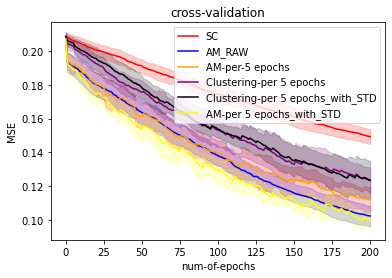

In [11]:
    #plot result!
    plt.figure()
    plt.plot([j for j in range(len(m))], m, "red")
    plt.fill_between([j for j in range(len(m))], m - s, m + s, color='red', alpha=0.2)
    plt.plot([j for j in range(len(m1))], m1, "blue")
    plt.fill_between([j for j in range(len(m1))], m1 - s1, m1 + s1, color='blue', alpha=0.2)
    plt.plot([j for j in range(len(m2))], m2, "orange")
    plt.fill_between([j for j in range(len(m2))], m2 - s2, m2 + s2, color='red', alpha=0.2)
    plt.plot([j for j in range(len(m3))], m3, "purple")
    plt.fill_between([j for j in range(len(m3))], m3 - s3, m3 + s3, color='purple', alpha=0.2)
    plt.plot([j for j in range(len(m4))], m4, "black")
    plt.fill_between([j for j in range(len(m4))], m4 - s4, m4 + s4, color='black', alpha=0.2)
    plt.plot([j for j in range(len(m5))], m5, "yellow")
    plt.fill_between([j for j in range(len(m5))], m5 - s5, m5 + s5, color='yellow', alpha=0.2)
    plt.legend(["SC", "AM_RAW", "AM-per-5 epochs", "Clustering-per 5 epochs",
                "Clustering-per 5 epochs_with_STD", "AM-per 5 epochs_with_STD"])
    # [{0: train_raw, 1: train_AM, 2: train_MOVE_AM, 3: train_MOVE_C, 4: train_MOVE_C_STD, 5: train_MOVE_AM_STD}]
    plt.xlabel("num-of-epochs")
    plt.ylabel("MSE")
    plt.title("cross-validation")
    plt.show()